In [76]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
df = pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
null_counts = df.isnull().sum()
print(null_counts)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


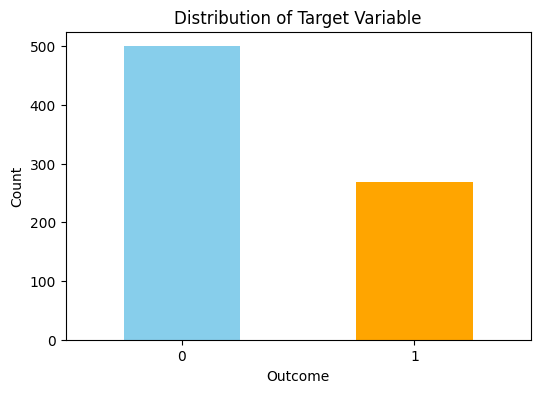

In [79]:

plt.figure(figsize=(6, 4))
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

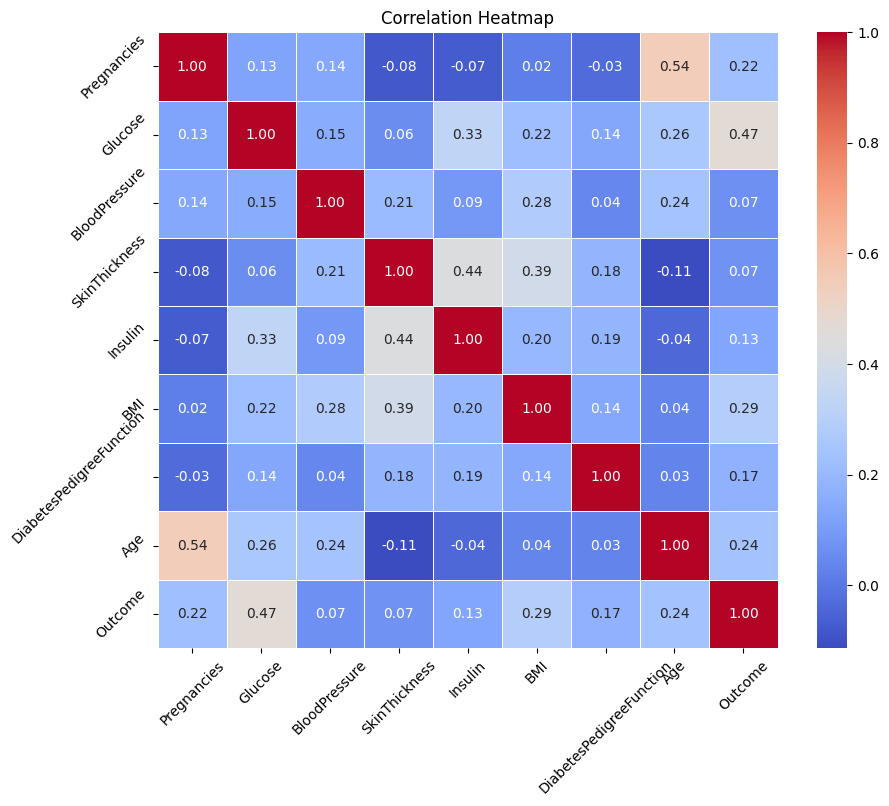

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title('Correlation Heatmap')

plt.show()


Oversampling:
When the dataset is small: If you have a small dataset, duplicating or generating synthetic samples through oversampling techniques like SMOTE can help increase the amount of training data, potentially leading to better generalization.

When there's significant information in minority class samples: If the minority class contains valuable information for your model, it's preferable to generate synthetic samples to preserve that information.

When computational resources are not a constraint: Oversampling methods usually increase the size of the dataset, which can be computationally expensive. If computational resources are not an issue, oversampling can be a suitable option.

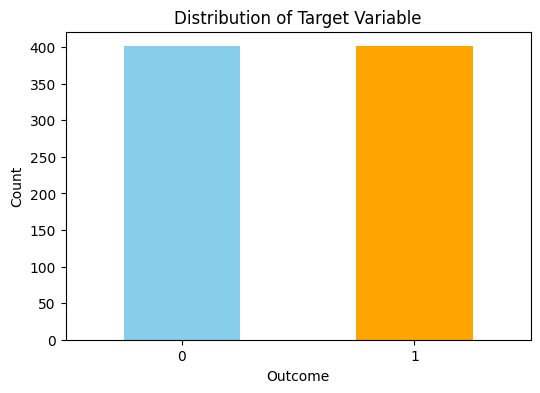

In [81]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
plt.figure(figsize=(6, 4))
y_resampled.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)
feature_importances = model.feature_importances_
print(feature_importances)
feature_importance_dict = dict(zip(X_resampled.columns, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_n = 4
top_features = [feature[0] for feature in sorted_feature_importance[:top_n]]
X_top_features = X_resampled[top_features]

[0.06831666 0.24221536 0.08246717 0.07075528 0.07416648 0.18598509
 0.12529782 0.15079614]


In [83]:
print(X_top_features)


     Glucose        BMI  Age  DiabetesPedigreeFunction
0         84   0.000000   21                  0.304000
1        112  28.200000   50                  1.282000
2        139  28.700000   22                  0.654000
3        161  21.900000   65                  0.254000
4        134  46.200000   46                  0.238000
..       ...        ...  ...                       ...
797      105  35.621270   25                  0.786097
798      176  32.884290   32                  0.559282
799       99  38.408406   31                  0.826726
800      130  35.894051   34                  0.864951
801      108  31.175075   36                  0.712328

[802 rows x 4 columns]


In [84]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
model2 = ExtraTreesClassifier()
model2.fit(X_top_features, y_resampled)

ExtraTreesClassifier()

In [85]:
columns_to_drop = ['Pregnancies', 'BloodPressure', 'SkinThickness','Insulin']
X_test.drop(columns=columns_to_drop, inplace=True)

In [86]:
X_test.columns
col1 = 'Age'
col2 = 'DiabetesPedigreeFunction'
X_test[col1], X_test[col2] = X_test[col2].copy(), X_test[col1].copy()

In [87]:
print(X_test.head())
X_test.rename(columns={col1: 'temp_name'}, inplace=True)
X_test.rename(columns={col2: col1}, inplace=True)
X_test.rename(columns={'temp_name': col2}, inplace=True)

     Glucose   BMI  DiabetesPedigreeFunction    Age
668       98  34.0                        43  0.430
324      112  35.7                        21  0.148
624      108  30.8                        21  0.158
690      107  24.6                        34  0.856
473      136  29.9                        50  0.210


In [88]:
print(X_test.head())

     Glucose   BMI  Age  DiabetesPedigreeFunction
668       98  34.0   43                     0.430
324      112  35.7   21                     0.148
624      108  30.8   21                     0.158
690      107  24.6   34                     0.856
473      136  29.9   50                     0.210


In [89]:
from sklearn.metrics import accuracy_score
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


In [90]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.6212121212121212
Recall: 0.7454545454545455


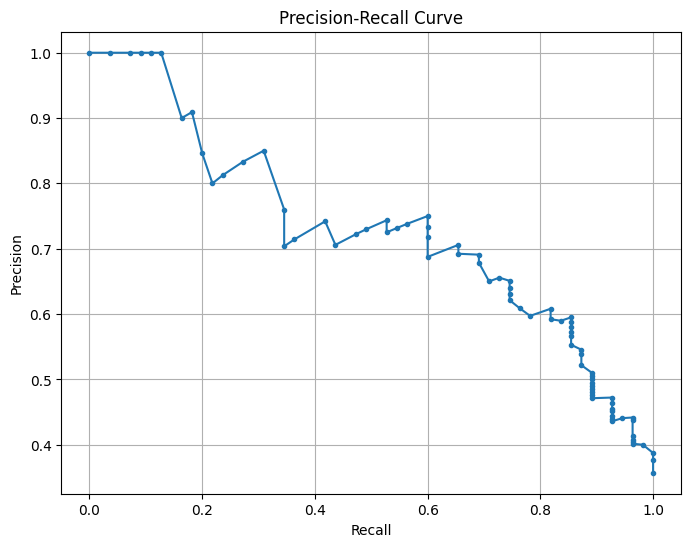

In [91]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_scores = model2.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)
grid_search.fit(X_top_features, y_resampled)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7662337662337663
Precision: 0.6338028169014085
Recall: 0.8181818181818182


In [93]:

from sklearn.model_selection import cross_val_score, KFold

model3 = ExtraTreesClassifier()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model3, X_top_features, y_resampled, cv=kf, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard Deviation of accuracy:", np.std(scores))


Cross-validation accuracy scores: [0.82716049 0.7654321  0.6875     0.9        0.775      0.7875
 0.8375     0.675      0.7625     0.8125    ]
Mean accuracy: 0.7830092592592593
Standard Deviation of accuracy: 0.06409136409182394
